(100, 100)


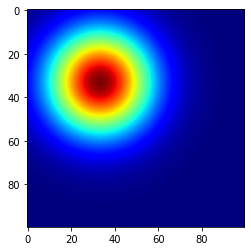

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# create 2 kernels
m1 = (-1,-1)
s1 = np.eye(2)
k1 = multivariate_normal(mean=m1, cov=s1)


#m2 = (1,1)
#s2 = np.eye(2)
#k2 = multivariate_normal(mean=m2, cov=s2)

# create a grid of (x,y) coordinates at which to evaluate the kernels
xlim = (-3, 3)
ylim = (-3, 3)

xres = 100
yres = 100

x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)

# evaluate kernels at grid points
xxyy = np.c_[xx.ravel(), yy.ravel()]
zz = k1.pdf(xxyy) #+ k2.pdf(xxyy)

# reshape and plot image
img = zz.reshape((xres,yres))

print(img.shape)

plt.imshow(img, cmap="jet"); plt.show()


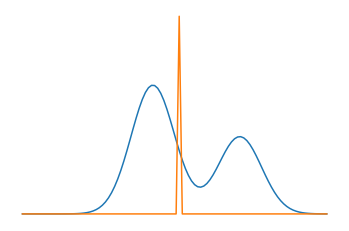

In [28]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)

mu2 = 4
variance2 = 1
sigma2 = math.sqrt(variance2)


x = np.linspace(mu - 6*sigma, mu + 8*sigma, 100)


plt.axis("off")
plt.plot(x, (stats.norm.pdf(x, mu, sigma)+0.6*stats.norm.pdf(x, mu2, sigma2))/1.6)

mu3 = 1.2
variance3 = 0.0001
sigma3 = math.sqrt(variance3)
plt.plot(x, 0.02*stats.norm.pdf(x, mu3, sigma3))

plt.show()


In [12]:
print(x.shape)

(100,)


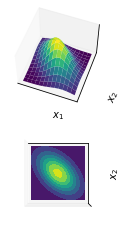

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()